# Prés Traitement 

In [1]:
import pandas as pd 
titanic = pd.read_csv('titanic-passengers.csv',sep=';')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# suppression des colonnes inutiles pour notre modele 
titanic.drop('Name',axis=1,inplace=True)
titanic.drop('Embarked',axis=1,inplace=True)
titanic.drop('SibSp',axis=1,inplace=True)
titanic.drop('Parch',axis=1,inplace=True)
titanic.drop('Ticket',axis=1,inplace=True)
titanic.drop('Cabin',axis=1,inplace=True)
titanic.drop('Fare',axis=1,inplace=True)
titanic.drop('PassengerId',axis=1,inplace=True)

In [5]:
print('\n Features',titanic.columns)


 Features Index(['Survived', 'Pclass', 'Sex', 'Age'], dtype='object')


In [6]:
titanic['Age'].fillna(0, inplace=True)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [8]:
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [9]:
titanic['Sex']

0      0
1      0
2      0
3      1
4      0
      ..
886    1
887    0
888    1
889    0
890    1
Name: Sex, Length: 891, dtype: int64

survived histogram 


Text(0.5, 1.0, 'Histogramme de survivant et non survivant')

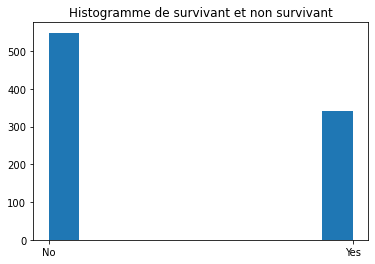

In [10]:
import matplotlib.pyplot as plt
print('survived histogram ')
plt.hist(titanic['Survived'])
plt.title('Histogramme de survivant et non survivant')


# Régression logistique 

la regression logistique permet de predire si un passage est surveccu ou non ce modele prend deux yes or non oubien 0 ou 1

In [11]:
#preparing data for logistic regression
# titanic["Survived"]=titanic["Survived"].map({"yes": 1, "no": 0})   #convert admitted variable into numerical
titanic['Survived'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [12]:
titanic['Survived']

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 891, dtype: int64

In [13]:
#features extraction
y = titanic['Survived']
x = titanic.drop('Survived', axis=1)

In [14]:
y.isnull().sum()

0

In [15]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
# printing the shapes of the new x and y objects 
print('training set:')
print(x_train.shape) 
print(y_train.shape)

print('test set:')
print(x_test.shape) 
print(y_test.shape) 

training set:
(668, 3)
(668,)
test set:
(223, 3)
(223,)


In [17]:
# making predictions on the testing set 
from sklearn.linear_model import LogisticRegression

regLogistic = LogisticRegression()   #build our logistic model
regLogistic.fit(x_train, y_train)  #fitting training data
y_pred  = regLogistic.predict(x_test)    #testing model’s performance

In [18]:
print("Classes prédites pour les exemples de test\n ")
print(y_pred)

print("Accuracy={:.2f}".format(regLogistic.score(x_test, y_test)))

Classes prédites pour les exemples de test
 
[1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0
 0]
Accuracy=0.80


In [19]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn.metrics import accuracy_score
efficacite = accuracy_score(y_test, y_pred)
erreur = 1-efficacite
print("Performances du modèle sur les exemples de test: ")
print("efficacité: ",efficacite," , soit ",efficacite*100,' %') 
print("erreur: ",erreur," , soit ",erreur*100,' %') 

Performances du modèle sur les exemples de test: 
efficacité:  0.8026905829596412  , soit  80.26905829596413  %
erreur:  0.19730941704035876  , soit  19.730941704035875  %


In [20]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print('matrice de confusion avec les exemples de test')
print(conf)

matrice de confusion avec les exemples de test
[[124  20]
 [ 24  55]]


Text(89.18, 0.5, 'classes réelles')

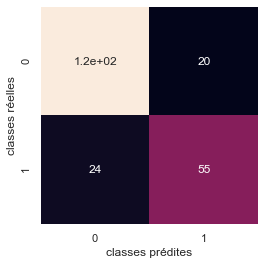

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(conf, square=True, annot=True, cbar=False)
plt.xlabel('classes prédites')
plt.ylabel('classes réelles')

In [22]:
from sklearn.metrics import classification_report
result = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       144
           1       0.73      0.70      0.71        79

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test) 

In [24]:
print("Classes prédites pour les exemples de test")
print(y_pred)

print("score:{}".format(accuracy_score(y_test, y_pred)))

Classes prédites pour les exemples de test
[1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 0]
score:0.7623318385650224


In [25]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn.metrics import accuracy_score
efficacite = accuracy_score(y_test, y_pred)
erreur = 1-efficacite
print("Performances du modèle sur les exemples de test: ")
print("efficacité: ",efficacite," , soit ",efficacite*100,' %') 
print("erreur: ",erreur," , soit ",erreur*100,' %') 

Performances du modèle sur les exemples de test: 
efficacité:  0.7623318385650224  , soit  76.23318385650224  %
erreur:  0.2376681614349776  , soit  23.76681614349776  %


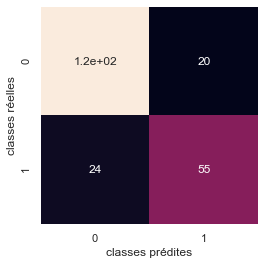

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(conf, square=True, annot=True, cbar=False)
plt.xlabel('classes prédites')
plt.ylabel('classes réelles');

In [27]:
from sklearn.metrics import classification_report
result = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       144
           1       0.73      0.52      0.61        79

    accuracy                           0.76       223
   macro avg       0.75      0.71      0.72       223
weighted avg       0.76      0.76      0.75       223



In [28]:
#lets run KNeighborsClassifier for k = 1 to 31
accuracy_list = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)   
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    accuracy_list.append(acc)

k_list = list(range(1,31))
print("Pour les valeurs de k\n :")
print(k_list)
print("Les valeurs de l'efficacités sont\n :")
print(accuracy_list)

Pour les valeurs de k
 :
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Les valeurs de l'efficacités sont
 :
[0.7623318385650224, 0.7533632286995515, 0.7847533632286996, 0.7757847533632287, 0.7623318385650224, 0.7488789237668162, 0.7623318385650224, 0.757847533632287, 0.7354260089686099, 0.7623318385650224, 0.7443946188340808, 0.7623318385650224, 0.726457399103139, 0.7399103139013453, 0.726457399103139, 0.7443946188340808, 0.7488789237668162, 0.7354260089686099, 0.757847533632287, 0.757847533632287, 0.7623318385650224, 0.757847533632287, 0.7443946188340808, 0.726457399103139, 0.757847533632287, 0.7399103139013453, 0.7309417040358744, 0.7219730941704036, 0.7040358744394619, 0.7130044843049327]


# Tracé de la valeur K optimale

Courbe de l'efficacité du modèle en fonction de k


Text(0, 0.5, 'accuracy')

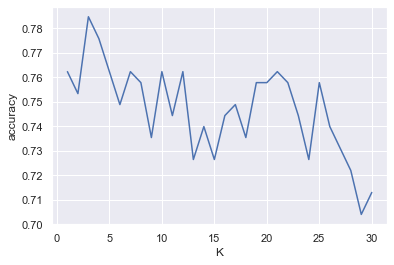

In [29]:
print("Courbe de l'efficacité du modèle en fonction de k")
plt.plot(k_list,accuracy_list)
plt.xlabel("K")
plt.ylabel('accuracy')

# Arbre de décision 

In [30]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

arbre = tree.DecisionTreeClassifier()  
arbre.fit(x_train, y_train)   
y_pred=arbre.predict(x_test)   

In [31]:
print("Classes prédites pour les exemples de test\n ")
print(y_pred)
print("score:{}".format(accuracy_score(y_test, y_pred)))

Classes prédites pour les exemples de test
 
[1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 0]
score:0.8071748878923767


In [32]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn.metrics import accuracy_score
efficacite = accuracy_score(y_test, y_pred)
erreur = 1-efficacite
print("Performances du modèle sur les exemples de test: ")
print("efficacité: ",efficacite," , soit ",efficacite*100,' %') 
print("erreur: ",erreur," , soit ",erreur*100,' %') 

Performances du modèle sur les exemples de test: 
efficacité:  0.8071748878923767  , soit  80.71748878923766  %
erreur:  0.19282511210762332  , soit  19.282511210762333  %


In [33]:
import graphviz
dor_data = arbre.export_graphviz(classifier,out_fit=None)
graphe = graphviz.Source(dor_data)
graphe.render("data")
graphe

ModuleNotFoundError: No module named 'graphviz'

Courbe de l'arbre de decision


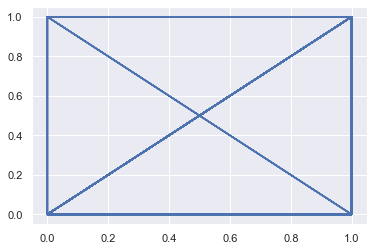

In [34]:
import matplotlib.pyplot as plt
print("Courbe de l'arbre de decision")
plt.plot(y_test,y_pred)


#  Foret aléatoire

In [35]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

#Creating a random forest with 10 decision trees
foret=RandomForestClassifier(n_estimators=10)  
foret.fit(x_train, y_train)  
y_pred=foret.predict(x_test) 

In [36]:
print("Classes prédites pour les exemples de test\n ")
print(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Classes prédites pour les exemples de test
 
[1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 0]
Accuracy: 0.8161434977578476


In [37]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn.metrics import accuracy_score
efficacite = accuracy_score(y_test, y_pred)
erreur = 1-efficacite
print("Performances du modèle sur les exemples de test: ")
print("efficacité: ",efficacite," , soit ",efficacite*100,' %') 
print("erreur: ",erreur," , soit ",erreur*100,' %') 

Performances du modèle sur les exemples de test: 
efficacité:  0.8161434977578476  , soit  81.61434977578476  %
erreur:  0.18385650224215244  , soit  18.385650224215244  %


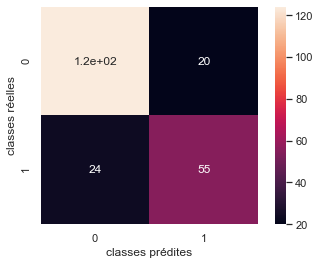

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.heatmap(conf, square=True, annot=True, cbar=True)
plt.xlabel('classes prédites')
plt.ylabel('classes réelles')

# Graphique des précisions

Graphique regroupant tout les pecisions


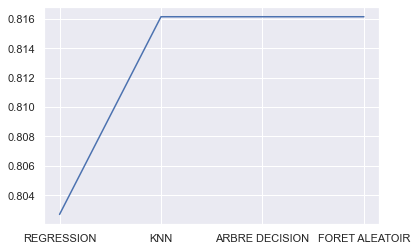

In [40]:
dict = { 'REGRESSION':regLogistic.score(x_test, y_test),
           'KNN': accuracy_score(y_test, y_pred),
        'ARBRE DECISION': accuracy_score(y_test, y_pred),
        'FORET ALEATOIR': metrics.accuracy_score(y_test, y_pred)
       }

import matplotlib.pyplot as plt
print("Graphique regroupant tout les pecisions")
plt.plot(dict.keys(),dict.values())